# FUTURE WORK 1

## Persona: King County government officals

Framing some possible questions from the POV of County government officals. Residential property tax assessors, county/city planning that want to learn about economic factors/data related to Residential property. Here are examples;

Does my zip code price out residents? Does the city/county need to work on making homes more affordable?
Are lots too small/overcrowding/stressing infrastucture? Are there differences in lot size between zip codes?
Are the homes good quality/newer/renovated if older. Are there differences between zip codes in home quality?
What percentage of homes are being renovated? What types of homes (large/small/historic/older) are being renovated?
For property tax assessment purposes, exploring home living area and lot compared to neighbors. Are homes that are larger than neigbhoring homes getting a 'tax break' in being comparied to smaller properties?


In [3]:
# Import the required libraries
import pandas as pd
import numpy as np

import scipy.stats as scs

import matplotlib.pyplot as plt
import seaborn as sns

# set up pandas to display floats in a more human friendly way
pd.options.display.float_format = '{:,.2f}'.format

In [4]:
# config and functions for charting 
sns.set_context('paper', font_scale=1.5)

def plot_grouped_boxplot(plot_x, plot_y, plot_hue, plot_data, pal):
    sns.boxplot(x=plot_x, y=plot_y, hue=plot_hue, data=plot_data, palette=pal)
    sns.despine(offset=10, trim=True)
    plt.show()


def plot_grouped_violin(plot_x, plot_y, plot_hue, plot_hue_order, plot_data, pal):
    ax = sns.catplot(x=plot_x, y=plot_y, hue=plot_hue, kind='violin', hue_order=plot_hue_order, data=plot_data, palette=pal)
    plt.show()

In [5]:
# read in the processed data
processed_df = pd.read_csv('../data/prepped_for_price_prediction.csv')
print(processed_df.shape)
processed_df.head(10)

(21015, 29)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view_rank,...,sqft_living15,sqft_lot15,bed_bath_ratio,date_month,date_day,date_year,renovated_status,sqft_living15_diff,sqft_lot15_diff,scenic_status
0,7129300520,10/13/2014,"221,900.00",3,1.00,1180,5650,1.00,0,0,...,1340,5650,3.00,10,13,2014,UNK,-160,0,N
1,6414100192,12/9/2014,"538,000.00",3,2.25,2570,7242,2.00,0,0,...,1690,7639,1.33,12,9,2014,Y,880,-397,N
2,5631500400,2/25/2015,"180,000.00",2,1.00,770,10000,1.00,0,0,...,2720,8062,2.00,2,25,2015,UNK,-1950,1938,N
3,2487200875,12/9/2014,"604,000.00",4,3.00,1960,5000,1.00,0,0,...,1360,5000,1.33,12,9,2014,UNK,600,0,N
4,1954400510,2/18/2015,"510,000.00",3,2.00,1680,8080,1.00,0,0,...,1800,7503,1.50,2,18,2015,UNK,-120,577,N
5,7237550310,5/12/2014,"1,230,000.00",4,4.50,5420,101930,1.00,0,0,...,4760,101930,0.89,5,12,2014,UNK,660,0,N
6,1321400060,6/27/2014,"257,500.00",3,2.25,1715,6819,2.00,0,0,...,2238,6819,1.33,6,27,2014,UNK,-523,0,N
7,2008000270,1/15/2015,"291,850.00",3,1.50,1060,9711,1.00,0,0,...,1650,9711,2.00,1,15,2015,UNK,-590,0,N
8,2414600126,4/15/2015,"229,500.00",3,1.00,1780,7470,1.00,0,0,...,1780,8113,3.00,4,15,2015,UNK,0,-643,N
9,3793500160,3/12/2015,"323,000.00",3,2.50,1890,6560,2.00,0,0,...,2390,7570,1.20,3,12,2015,UNK,-500,-1010,N


### Group by zipcode and look at the differences in 1) sales price 2) sqft_living 3)  sqft_lot 4) yr_built 

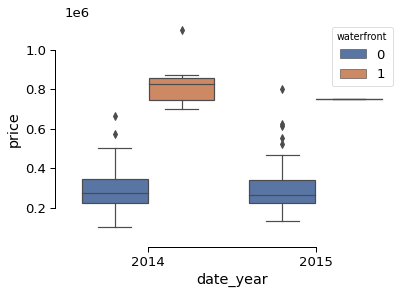

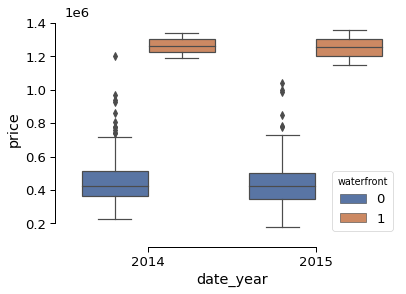

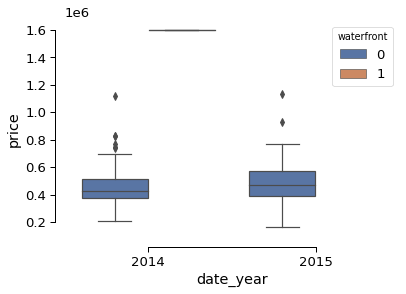

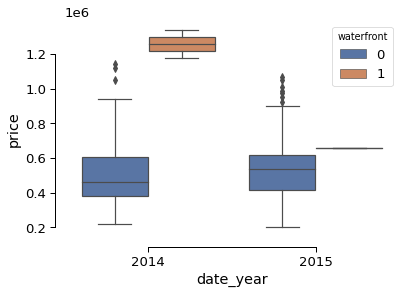

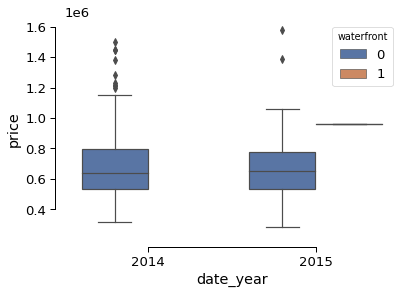

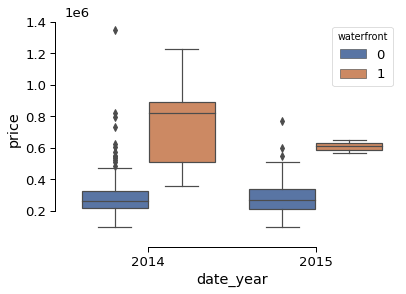

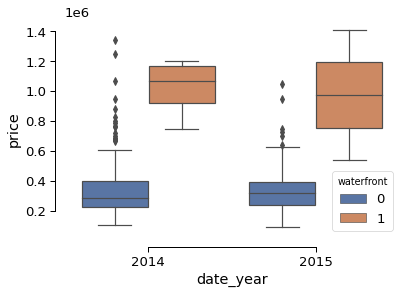

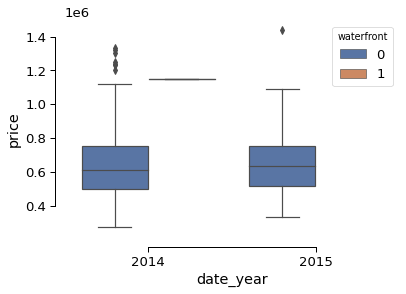

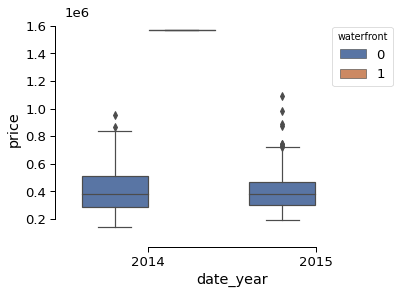

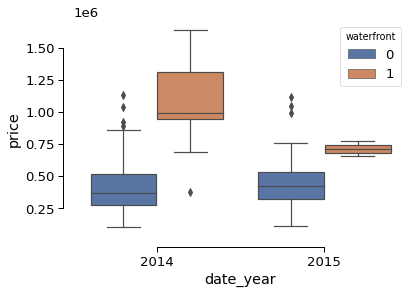

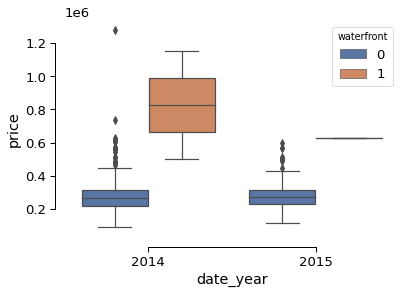

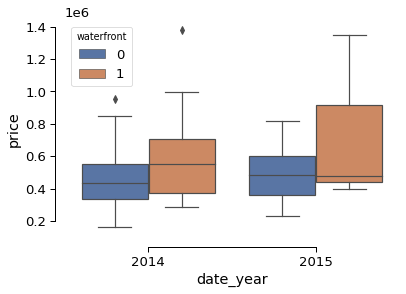

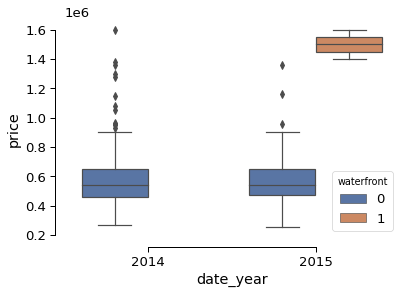

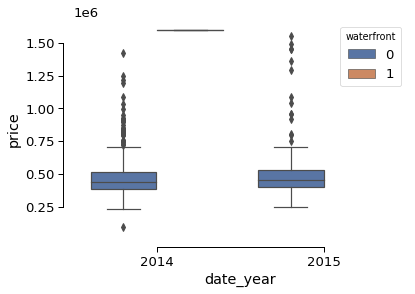

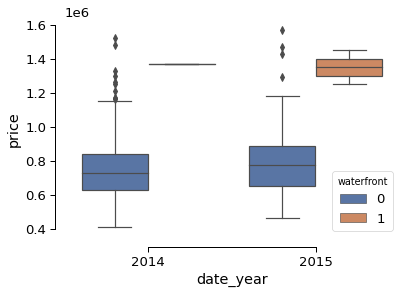

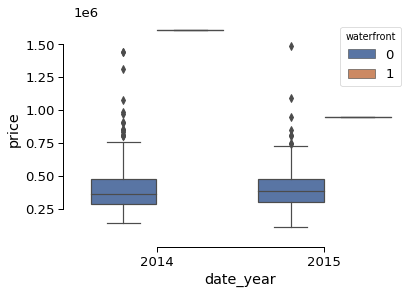

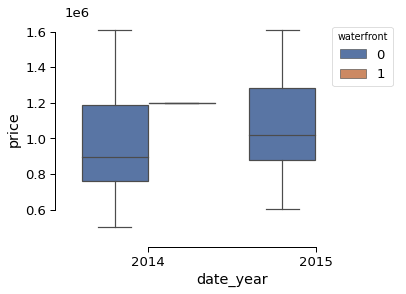

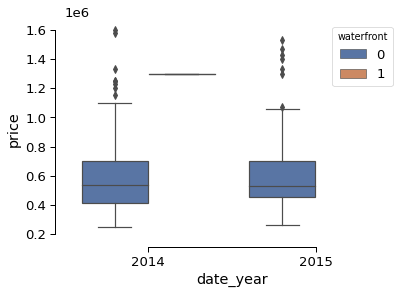

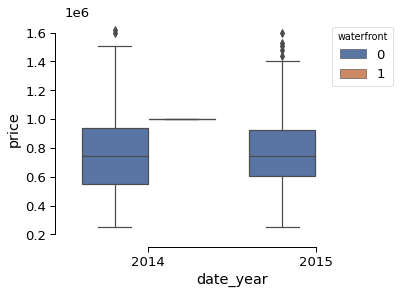

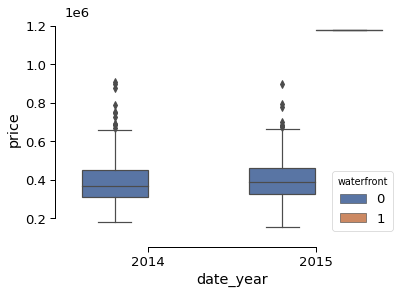

In [15]:
zipcodes = processed_df['zipcode'].unique()

sns.set_palette(palette='pastel')

for zip in zipcodes:
    zipcode_df = processed_df[(processed_df['zipcode'] == zip)]
    if zipcode_df['waterfront'].max() == 1.0:
        plot_grouped_boxplot('date_year', 'price', 'waterfront', zipcode_df, 'deep') 

###  Explore home living area and lot compared to neighbors 

In [9]:
print("--- df shape---")
print(processed_df.shape)
print("--- no difference between home/lot and neighbors ---")
print(processed_df[processed_df['sqft_living15_diff'] == 0].shape)
print(processed_df[processed_df['sqft_lot15_diff'] == 0].shape)
print("---- home/lot LARGER than neighbors---")
print(processed_df[processed_df['sqft_living15_diff'] > 0].shape)
print(processed_df[processed_df['sqft_lot15_diff']>0].shape)
print("---- home/lot SMALLER than neighbors---")
print(processed_df[processed_df['sqft_living15_diff'] < 0].shape)
print(processed_df[processed_df['sqft_lot15_diff']<0].shape)

--- df shape---
(21015, 29)
--- no difference between home/lot and neighbors ---
(2521, 29)
(4389, 29)
---- home/lot LARGER than neighbors---
(9440, 29)
(8297, 29)
---- home/lot SMALLER than neighbors---
(9054, 29)
(8329, 29)


# FUTURE WORK 2:
## Price Prediction - break up data by Zipcode Subregions and create models for each Subregion
Source for King County zipcode by Sub Region found [here](http://www.agingkingcounty.org/wp-content/uploads/sites/185/2016/09/SubRegZipCityNeighborhood.pdf)

In [10]:
zips_by_subregion_df = pd.read_csv('../data/zips_by_subregion.csv')

In [11]:
zips_by_subregion_df.head()

,zip,sub_region
0,98014,East Rural
1,98019,East Rural
2,98024,East Rural
3,98045,East Rural
4,98050,East Rural


In [13]:
len(zips_by_subregion_df['zip'].unique())

117

In [14]:
zips_by_subregion_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   zip         120 non-null    int64 
 1   sub_region  120 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.0+ KB


In [16]:
len(zips_by_subregion_df['sub_region'].unique())

22

In [17]:
zips_by_subregion_df['sub_region'].unique()

array(['East Rural', 'Seattle', 'East Urban', 'North',
       'North & Seattle Northwest', 'Seattle Downtown',
       'Seattle Capitol Hill', 'Seattle Lake Union', 'Seattle Northeast',
       'Seattle Delridge', 'Seattle Ballard', 'Seattle Duwamish',
       'Seattle Queen Anne/Magnolia', 'Seattle Southwest',
       'Seattle Southeast', 'Seattle Central', 'Seattle North',
       'South & Seattle Southwest', 'South Rural', 'South Urban',
       'Vashon Island', ' Vashon Island'], dtype=object)